# Data Exploration of Population Data

In [270]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [271]:
df = pd.read_csv(r'C:\Users\hmishra8\Downloads\Datasets_ML\World population growth rate by cities 2024.csv')
df

,City,Country,Continent,Population (2024),Population (2023),Growth Rate
0,Tokyo,Japan,Asia,37115035,37194105,-0.0021
1,Delhi,India,Asia,33807403,32941309,0.0263
2,Shanghai,China,Asia,29867918,29210808,0.0225
3,Dhaka,Bangladesh,Asia,23935652,23209616,0.0313
4,Sao Paulo,Brazil,South America,22806704,22619736,0.0083
...,...,...,...,...,...,...
796,Bhavnagar,India,Asia,751493,737128,0.0195
797,Sheffield,United Kingdom,Europe,751303,745876,0.0073
798,Huambo,Angola,Africa,751297,727641,0.0325
799,Ribeirao Preto,Brazil,South America,750174,742115,0.0109


In [272]:
df.rename(columns={'Population (2024)': 'Population_2024', 'Population (2023)': 'Population_2023', 'Growth Rate': 'Growth_Rate'}, inplace=True)
print(df)

               City         Country      Continent  Population_2024  \
0             Tokyo           Japan           Asia         37115035   
1             Delhi           India           Asia         33807403   
2          Shanghai           China           Asia         29867918   
3             Dhaka      Bangladesh           Asia         23935652   
4         Sao Paulo          Brazil  South America         22806704   
..              ...             ...            ...              ...   
796       Bhavnagar           India           Asia           751493   
797       Sheffield  United Kingdom         Europe           751303   
798          Huambo          Angola         Africa           751297   
799  Ribeirao Preto          Brazil  South America           750174   
800       Panzhihua           China           Asia           750036   

     Population_2023  Growth_Rate  
0           37194105      -0.0021  
1           32941309       0.0263  
2           29210808       0.0225  
3  

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City             801 non-null    object 
 1   Country          801 non-null    object 
 2   Continent        790 non-null    object 
 3   Population_2024  801 non-null    int64  
 4   Population_2023  801 non-null    int64  
 5   Growth_Rate      801 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 37.7+ KB


In [274]:
df.describe()

,Population_2024,Population_2023,Growth_Rate
count,8.010000e+02,8.010000e+02,801.000000
mean,2.654327e+06,2.604461e+06,0.020051
std,3.723253e+06,3.661201e+06,0.012180
min,7.500360e+05,7.228360e+05,-0.024900
25%,9.909310e+05,9.698040e+05,0.012200
50%,1.379368e+06,1.363510e+06,0.019700
75%,2.570980e+06,2.514077e+06,0.026600
max,3.711504e+07,3.719410e+07,0.058200


In [275]:
df.size

4806

In [276]:
df.shape

(801, 6)

In [277]:
df.columns

Index(['City', 'Country', 'Continent', 'Population_2024', 'Population_2023',
       'Growth_Rate'],
      dtype='object')

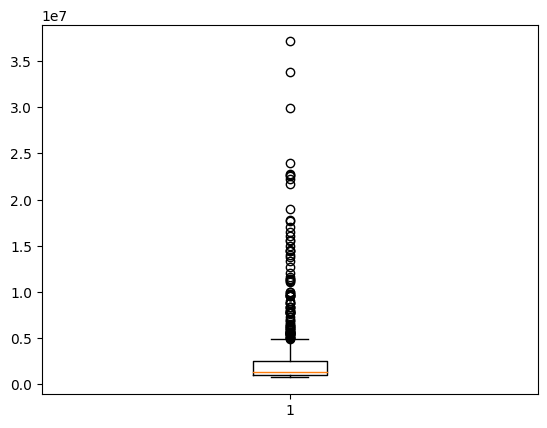

<Figure size 1000x700 with 0 Axes>

In [278]:
a = df['Population_2024']
plt.boxplot(a)
fig = plt.figure(figsize=(10,7))
plt.show()

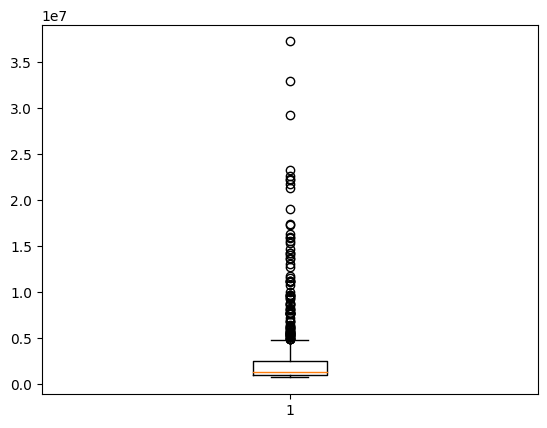

<Figure size 1000x700 with 0 Axes>

In [279]:
b = df['Population_2023']
plt.boxplot(b)
fig = plt.figure(figsize=(10,7))
plt.show()

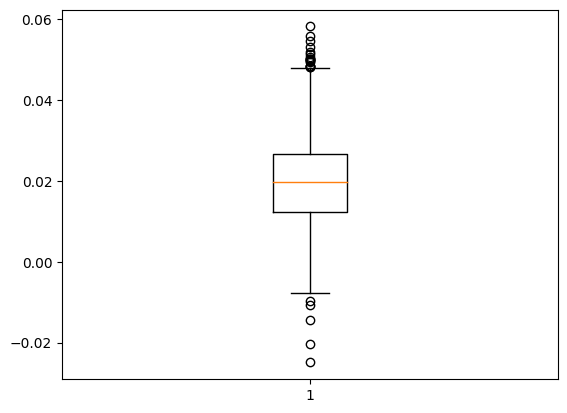

<Figure size 1000x700 with 0 Axes>

In [280]:
c = df['Growth_Rate']
plt.boxplot(c)
fig = plt.figure(figsize=(10,7))
plt.show()

# Data Cleaning Process of Population Data

In [281]:
df.isnull().sum()

City                0
Country             0
Continent          11
Population_2024     0
Population_2023     0
Growth_Rate         0
dtype: int64

In [282]:
# Display rows where Continent is null
null_continent_rows = df[df['Continent'].isnull()]
print(null_continent_rows)

                    City                   Country Continent  Population_2024  \
133        Santo Domingo        Dominican Republic       NaN          3587402   
146          Ouagadougou              Burkina Faso       NaN          3358934   
184           Manchester            United Kingdom       NaN          2811756   
187          Brazzaville     Republic of the Congo       NaN          2724566   
313              Glasgow            United Kingdom       NaN          1708147   
400         Pointe Noire     Republic of the Congo       NaN          1379368   
424               Prague            Czech Republic       NaN          1327947   
604               Bangui  Central African Republic       NaN           985965   
628          Southampton            United Kingdom       NaN           959202   
718  Newcastle Upon Tyne            United Kingdom       NaN           828712   
736           Nottingham            United Kingdom       NaN           813078   

     Population_2023  Growt

In [283]:
null_continents_countries_list = null_continent_rows['Country'].tolist()
null_continents_countries_list

['Dominican Republic',
 'Burkina Faso',
 'United Kingdom',
 'Republic of the Congo',
 'United Kingdom',
 'Republic of the Congo',
 'Czech Republic',
 'Central African Republic',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom']

In [284]:
df.dropna(inplace=True)

In [285]:
df.duplicated().value_counts()

False    790
Name: count, dtype: int64

# Data Visualization

In [286]:
df.nunique()

City               786
Country            128
Continent            7
Population_2024    790
Population_2023    790
Growth_Rate        376
dtype: int64

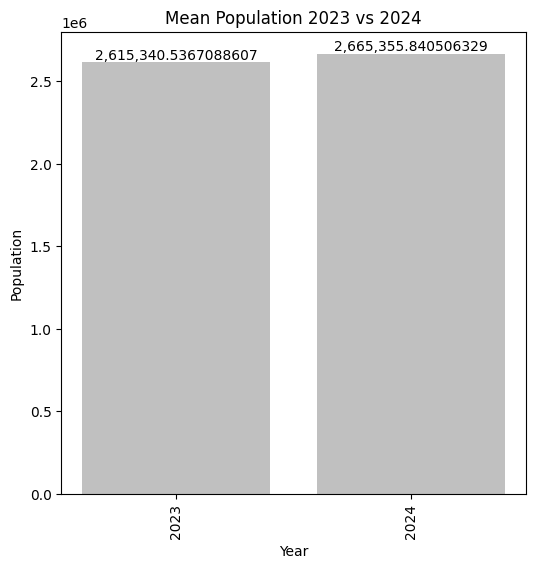

In [287]:
#Comparing the world population for the year 2023 and 2024
year = ['2023', '2024']
population_2023 = df['Population_2023'].mean()
population_2024 = df['Population_2024'].mean()
plt.figure(figsize=(6,6))  # Optional: Adjust the size of the figure
bars = plt.bar(year, [population_2023, population_2024], color='Silver')

#Bar Width
bar = 0.000001

# Add titles and labels
plt.title('Mean Population 2023 vs 2024')
plt.xlabel('Year')
plt.ylabel('Population')

# Add values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,}', va='bottom', ha='center')  # Adding comma for readability

# Rotate x-axis labels if needed
plt.xticks(rotation=90)
plt.show()

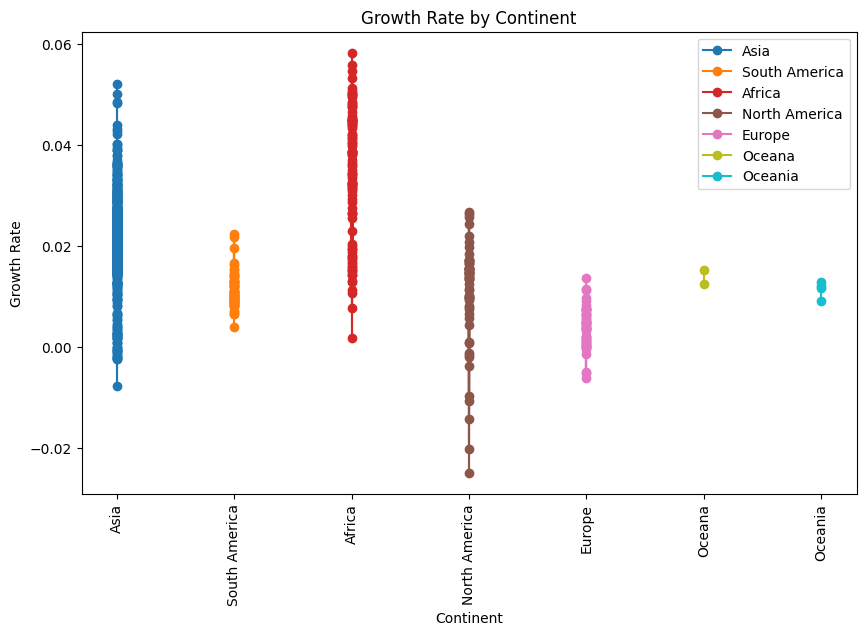

In [288]:
continents = df['Continent'].unique()
colors = plt.cm.get_cmap('tab10', len(continents))  # Using a colormap with distinct colors

plt.figure(figsize=(10, 6))  # Optional: Adjust the size of the figure

for i, continent in enumerate(continents):
    # Filter data for the current continent
    continent_data = df[df['Continent'] == continent]
    plt.plot(continent_data['Continent'], continent_data['Growth_Rate'], 
             marker='o', linestyle='-', color=colors(i), label=continent)

plt.title('Growth Rate by Continent')
plt.xlabel('Continent')
plt.ylabel('Growth Rate')
# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [289]:
#Identifying the Continents that have highest population in 2024
population = df.groupby('Continent')['Population_2024'].sum().sort_values(ascending=False)
continent_population = population.to_dict()
continent_population

{'Asia': 1373154171,
 'Africa': 278760603,
 'South America': 195778386,
 'North America': 136149760,
 'Europe': 103535708,
 'Oceana': 10500496,
 'Oceania': 7751990}

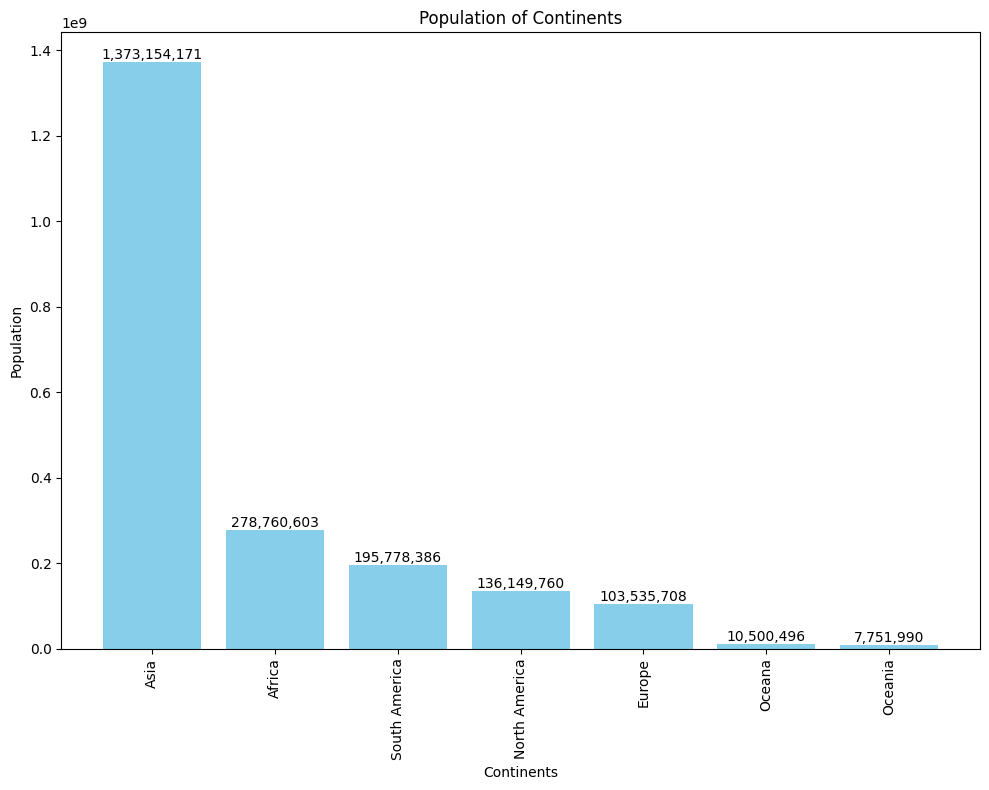

In [290]:
# Create a bar graph
continents = continent_population.keys()
population = continent_population.values()

plt.figure(figsize=(10, 8))  # Optional: Adjust the size of the figure
bars = plt.bar(continents, population, color='skyblue')

# Add titles and labels
plt.title('Population of Continents')
plt.xlabel('Continents')
plt.ylabel('Population')

# Add values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,}', va='bottom', ha='center')  # Adding comma for readability

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

In [291]:
Growth_rate_by_country = df.groupby('Country')['Growth_Rate'].sum().sort_values(ascending=False).nlargest(10)
Growth_rate_by_country

Country
China        5.3696
India        2.0540
Nigeria      0.8999
Mexico       0.4430
Indonesia    0.4328
DR Congo     0.4225
Pakistan     0.3284
Brazil       0.2861
Angola       0.2568
Iraq         0.2230
Name: Growth_Rate, dtype: float64

In [292]:
Growth_rate_by_country.to_dict()

{'China': 5.3696,
 'India': 2.054,
 'Nigeria': 0.8999,
 'Mexico': 0.443,
 'Indonesia': 0.4328,
 'DR Congo': 0.4225,
 'Pakistan': 0.3284,
 'Brazil': 0.2861,
 'Angola': 0.25680000000000003,
 'Iraq': 0.223}

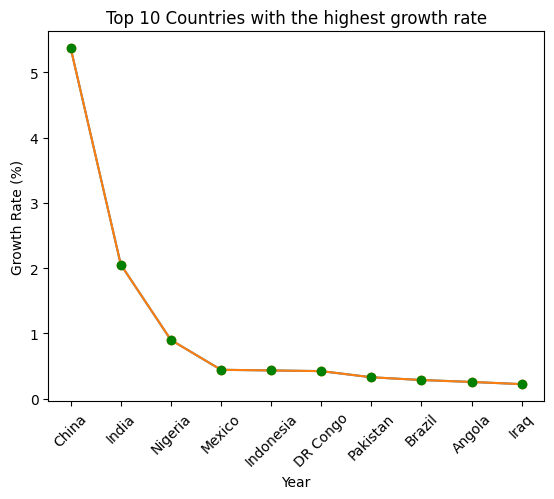

<Figure size 1000x1000 with 0 Axes>

In [293]:
# Top 10 countries with the highest growth Rate

Country = Growth_rate_by_country.index
Growth_Rate = Growth_rate_by_country.values
plt.plot(Country, Growth_Rate)
plt.plot(Country, Growth_Rate, label='Growth Rate', marker='o')  # Plot line with markers
plt.scatter(Country, Growth_Rate, color='Green', zorder=5)  # Add scatter plot for data points
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('Growth Rate (%)')
plt.title('Top 10 Countries with the highest growth rate')
plt.figure(figsize=(10,10))

plt.show()

In [294]:
# Top cities and countries with the highest population in 2024
cities_and_countries = df.groupby(['City', 'Country'])['Population_2024'].sum().sort_values(ascending=False).nlargest(20)
cities_and_countries

City          Country    
Tokyo         Japan          37115035
Delhi         India          33807403
Shanghai      China          29867918
Dhaka         Bangladesh     23935652
Sao Paulo     Brazil         22806704
Cairo         Egypt          22623874
Mexico City   Mexico         22505315
Beijing       China          22189082
Mumbai        India          21673149
Osaka         Japan          18967459
Chongqing     China          17773923
Karachi       Pakistan       17648555
Kinshasa      DR Congo       17032322
Lagos         Nigeria        16536018
Istanbul      Turkey         16047350
Buenos Aires  Argentina      15618288
Kolkata       India          15570786
Manila        Philippines    14941953
Guangzhou     China          14590096
Tianjin       China          14470873
Name: Population_2024, dtype: int64

In [295]:
# Reset index to convert Series to DataFrame
cities_and_countries_df = cities_and_countries.reset_index()
cities_and_countries_df

,City,Country,Population_2024
0,Tokyo,Japan,37115035
1,Delhi,India,33807403
2,Shanghai,China,29867918
3,Dhaka,Bangladesh,23935652
4,Sao Paulo,Brazil,22806704
...,...,...,...
15,Buenos Aires,Argentina,15618288
16,Kolkata,India,15570786
17,Manila,Philippines,14941953
18,Guangzhou,China,14590096


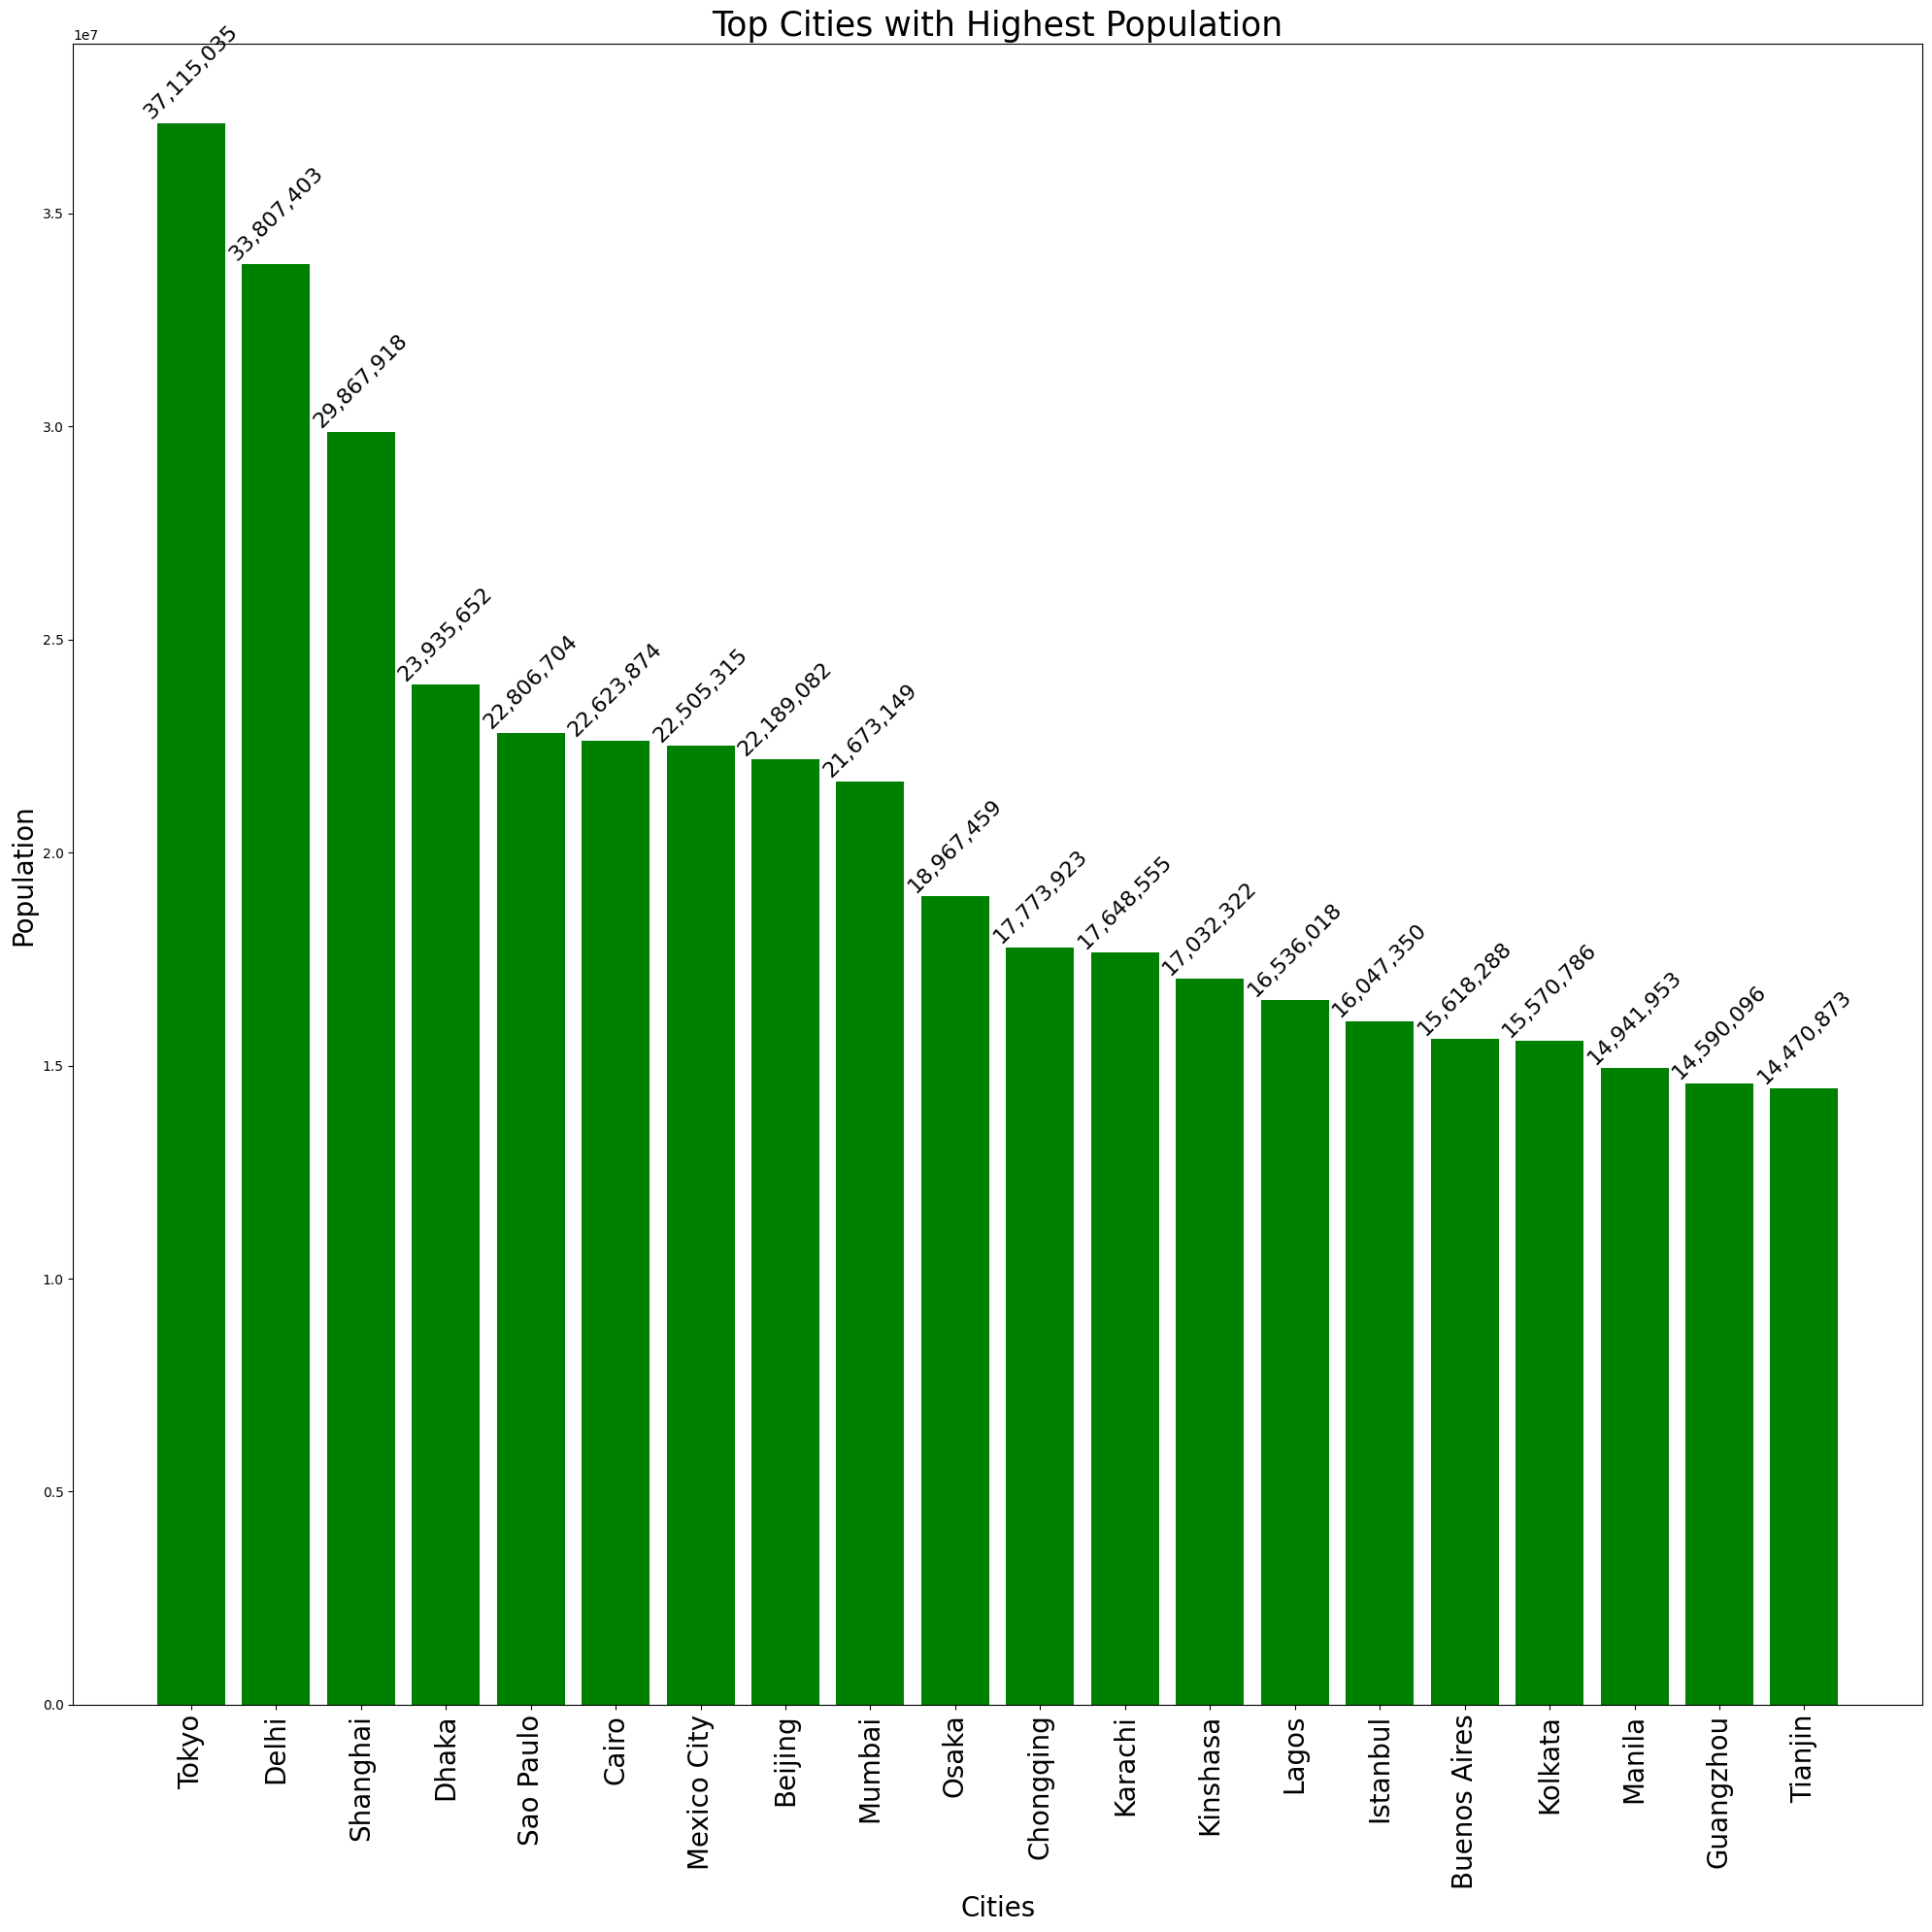

In [296]:
#Top 20 citites with the highest population 

City = cities_and_countries_df['City']
Population = cities_and_countries_df['Population_2024']

plt.figure(figsize=(20,20))  # Optional: Adjust the size of the figure
bars = plt.bar(City, Population, color='green')

# Add titles and labels
plt.title('Top Cities with Highest Population', fontsize=25)
plt.xlabel('Cities', fontsize=20)
plt.ylabel('Population', fontsize=20)

# Add values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,}', va='bottom', ha='center', fontsize= 16, rotation=45)  # Adding comma for readability

# Rotate x-axis labels if needed
plt.xticks(rotation=90, fontsize=20)

# Show the plot
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

In [297]:
# Top 20 Cities with the lowest population
cities_and_countries_lowest = df.groupby(['City', 'Country'])['Population_2024'].sum().sort_values()
lowest_populated_cities = cities_and_countries_lowest.head(20)
lowest_populated_cities_df = lowest_populated_cities.reset_index()
lowest_populated_cities_df

,City,Country,Population_2024
0,Panzhihua,China,750036
1,Ribeirao Preto,Brazil,750174
2,Huambo,Angola,751297
3,Sheffield,United Kingdom,751303
4,Bhavnagar,India,751493
...,...,...,...
15,Sargodha,Pakistan,757915
16,Seattle,United States,757992
17,Al Hudaydah,Yemen,759157
18,Jiamusi,China,761903


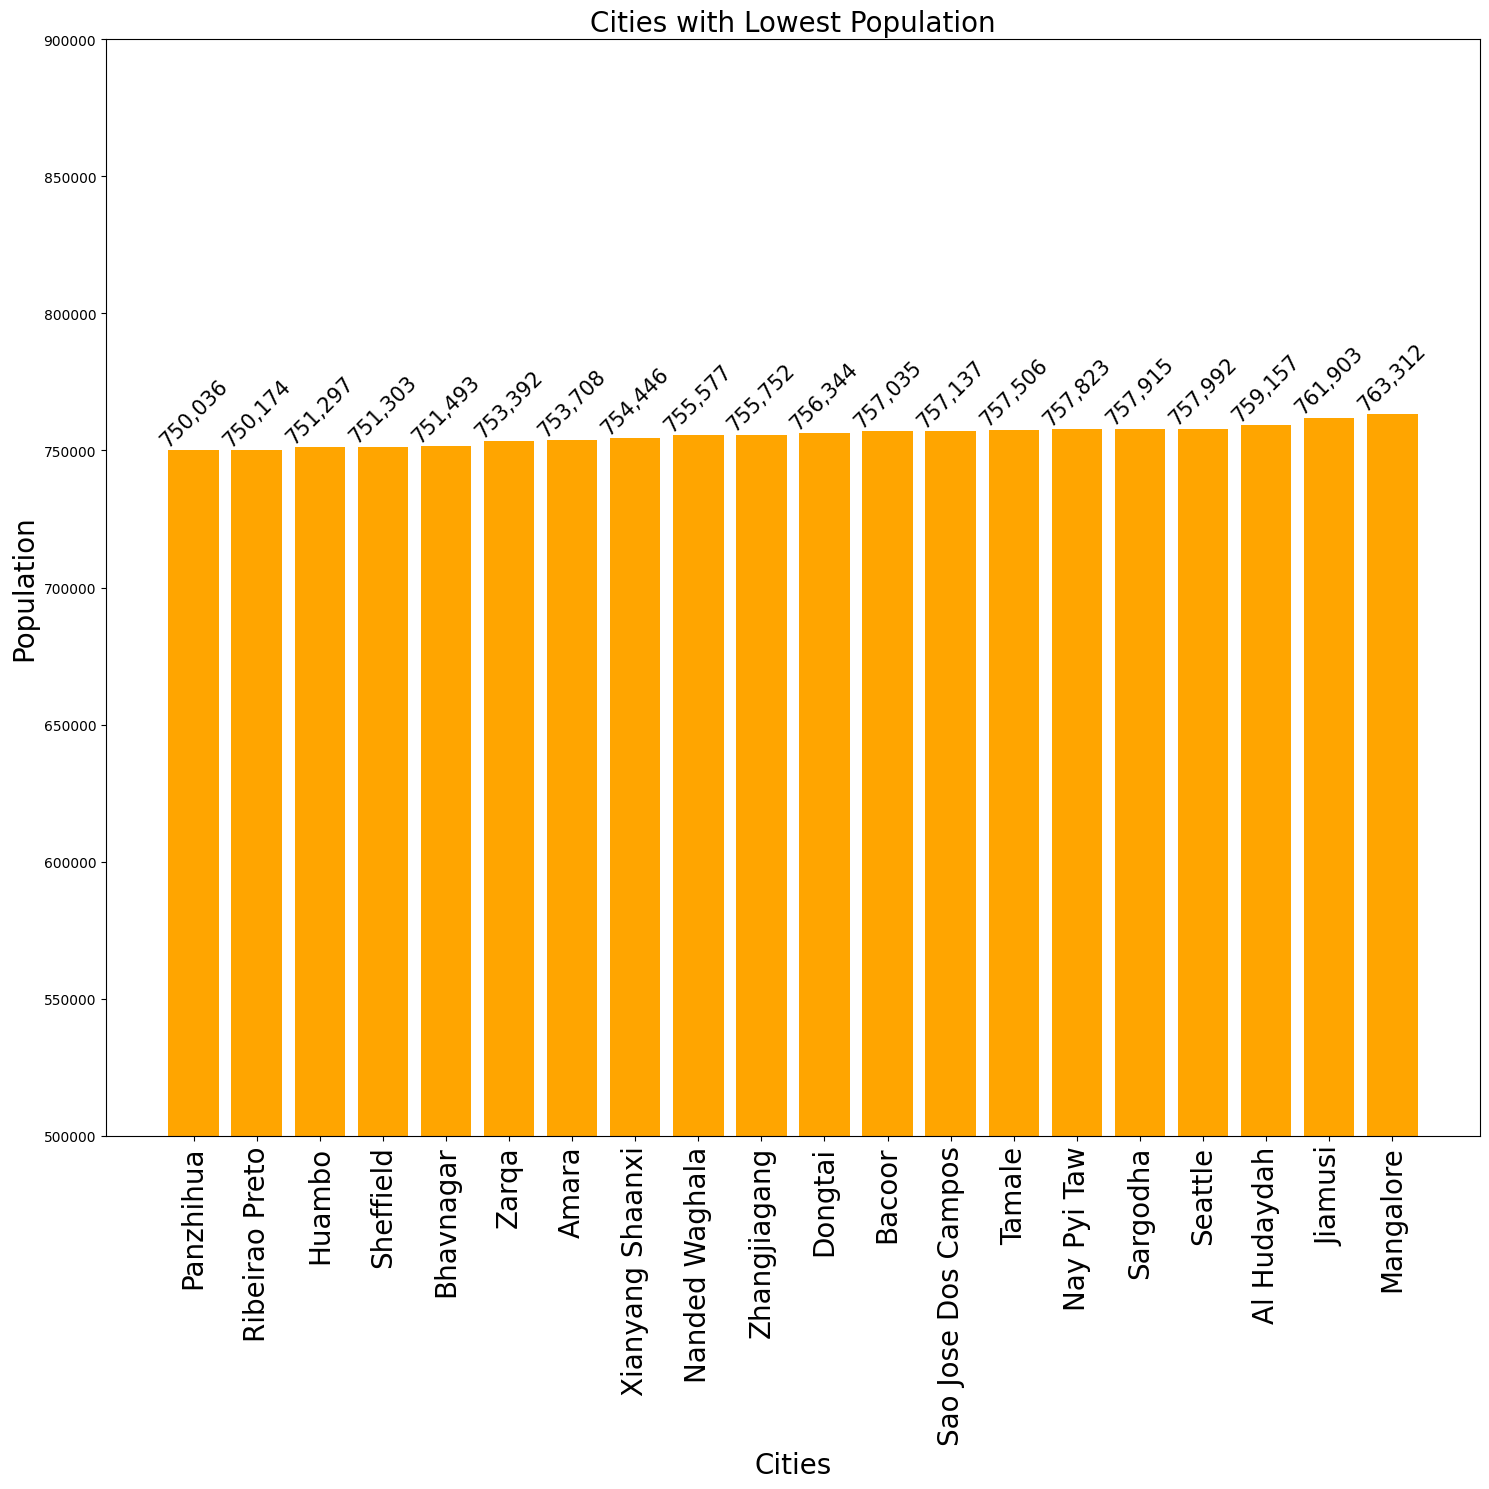

In [298]:
# Top 20 Cities with the lowest population
City = lowest_populated_cities_df['City']
Population = lowest_populated_cities_df['Population_2024']

plt.figure(figsize=(15,15))  # Optional: Adjust the size of the figure
bars = plt.bar(City, Population, color='Orange')

# Add titles and labels
plt.title('Cities with Lowest Population', fontsize=20)
plt.xlabel('Cities', fontsize=20)
plt.ylabel('Population', fontsize=20)

# Add values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,}', va='bottom', ha='center', fontsize= 15, rotation=45)  # Adding comma for readability

# Rotate x-axis labels if needed
plt.xticks(rotation=90, fontsize=20)

# Set y-axis limits
plt.ylim(500000, 900000)  # Adjust these values as needed

# Show the plot
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

In [299]:
growth_rate_mean_by_countries = df.groupby('Country')['Growth_Rate'].mean().sort_values(ascending=False).to_dict()
growth_rate_mean_by_countries

{'Burundi': 0.0582,
 'Uganda': 0.0532,
 'Burkina Faso': 0.05,
 'Benin': 0.0495,
 'Tanzania': 0.04856666666666667,
 'DR Congo': 0.04694444444444444,
 'Madagascar': 0.0456,
 'Ethiopia': 0.0445,
 'Somalia': 0.04413333333333333,
 'Angola': 0.042800000000000005,
 'Syria': 0.042175,
 'Zambia': 0.0417,
 'Malawi': 0.041499999999999995,
 'Mali': 0.0414,
 'Niger': 0.0411,
 'Mauritania': 0.0403,
 'Chad': 0.0397,
 'Kenya': 0.039349999999999996,
 'Nigeria': 0.03912608695652174,
 'Yemen': 0.03766,
 'Sudan': 0.0366,
 'Eritrea': 0.0364,
 'Cameroon': 0.03635,
 'Mozambique': 0.034866666666666664,
 'Liberia': 0.0342,
 'Ghana': 0.033875,
 'Rwanda': 0.0324,
 'Senegal': 0.0323,
 'Nepal': 0.0322,
 'Guinea': 0.0321,
 'Ivory Coast': 0.0317,
 'Cambodia': 0.0313,
 'Togo': 0.0308,
 'Vietnam': 0.030716666666666666,
 'Afghanistan': 0.0304,
 'Sierra Leone': 0.0293,
 'Myanmar': 0.028800000000000003,
 'Palestine': 0.0288,
 'Bangladesh': 0.028200000000000003,
 'Iraq': 0.027875,
 'Honduras': 0.026500000000000003,
 'Taji

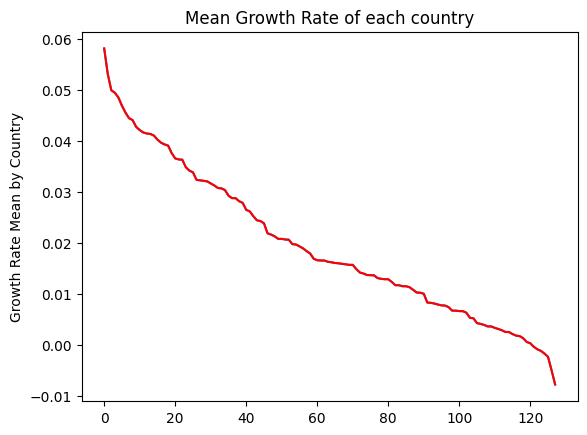

<Figure size 1000x1000 with 0 Axes>

In [300]:
#Growth Rate for each country 

Growth_Rate = growth_rate_mean_by_countries.values()

plt.plot(Growth_Rate)
plt.plot(Growth_Rate, label='Growth Rate', color='Red')  # Plot line with markers
plt.ylabel('Growth Rate Mean by Country')
plt.title('Mean Growth Rate of each country')
plt.figure(figsize=(10,10))
plt.show()